In [2]:
import pandas as pd 
import matplotlib as plt
import numpy as np 
from operator import itemgetter

In [3]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df_n = df.copy()

In [4]:
df_n["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [5]:
df_n["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [5]:
cols = list(df_n.columns)
df_na = {col: list(pd.isna(df_n[col])).count(True) for col in cols}
df_na

{'Rank': 0,
 'Name': 0,
 'Platform': 0,
 'Year': 271,
 'Genre': 0,
 'Publisher': 58,
 'NA_Sales': 0,
 'EU_Sales': 0,
 'JP_Sales': 0,
 'Other_Sales': 0,
 'Global_Sales': 0}

In [6]:
df_n = df_n.dropna()
cols = list(df_n.columns)
df_na = {col: list(pd.isna(df_n[col])).count(True) for col in cols}
df_na

{'Rank': 0,
 'Name': 0,
 'Platform': 0,
 'Year': 0,
 'Genre': 0,
 'Publisher': 0,
 'NA_Sales': 0,
 'EU_Sales': 0,
 'JP_Sales': 0,
 'Other_Sales': 0,
 'Global_Sales': 0}

In [7]:
print(df_n["Year"].max())
print(df_n["Year"].min())

2020.0
1980.0


In [9]:
year_stat = {"mean": df_n["Year"].mean(),
            "median": df_n["Year"].median(),
            "mode": df_n["Year"].mode().to_list(),
            "interquartile_range": df_n["Year"].quantile(0.75) - df_n["Year"].quantile(0.25),
            }
year_stat

{'mean': 2006.4055613528942,
 'median': 2007.0,
 'mode': [2009.0],
 'interquartile_range': 7.0}

In [10]:
print(df_n["Year"].quantile(0.05))
print(df_n["Year"].quantile(0.95))

1996.0
2015.0


In [12]:
print(df_n["Year"].count())
print(df_n["Year"][df_n.Year < 1996.0].count())
print(df_n["Year"][df_n.Year > 2015.0].count())

16291
705
346


In [13]:
df_n = df_n[df_n.Year >= 1996.0]
df_n = df_n[df_n.Year <= 2015.0]
df_n

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [7]:
print(df_n["NA_Sales"].max())
print(df_n["NA_Sales"].min())
sales_stat = {"mean": df_n["NA_Sales"].mean(),
            "median": df_n["NA_Sales"].median(),
            "mode": df_n["NA_Sales"].mode().to_list(),
            }
sales_stat

41.49
0.0


{'mean': 0.26564667607881653, 'median': 0.08, 'mode': [0.0]}

Text(0.5, 0, 'NA_Sales')

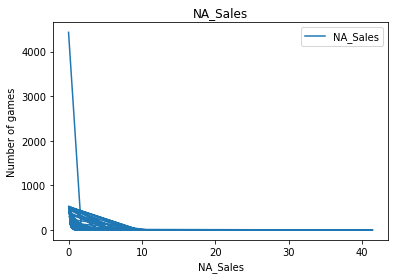

In [10]:
sales = {sale: df_n["NA_Sales"].to_list().count(sale) for sale in set(df_n["NA_Sales"])}
year_df = pd.DataFrame.from_dict(data=sales, orient="index", columns=["NA_Sales"])

fig = year_df.plot()
fig.set_title("NA_Sales")
fig.set_ylabel("Number of games")
fig.set_xlabel("NA_Sales")

In [11]:
print(df_n["NA_Sales"].quantile(0.05))
print(df_n["NA_Sales"].quantile(0.95))

0.0
1.07


In [13]:
print(df_n["NA_Sales"][df_n.NA_Sales < 0.0].count())
print(df_n["NA_Sales"][df_n.NA_Sales > 1.07].count())

0
803


In [14]:
print(df_n["EU_Sales"].max())
print(df_n["EU_Sales"].min())
sales_stat = {"mean": df_n["EU_Sales"].mean(),
            "median": df_n["EU_Sales"].median(),
            "mode": df_n["EU_Sales"].mode().to_list(),
            }
sales_stat

29.02
0.0


{'mean': 0.14773126266036463, 'median': 0.02, 'mode': [0.0]}

Text(0.5, 0, 'EU_Sales')

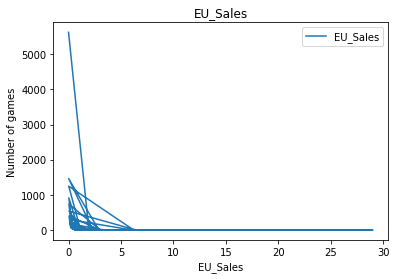

In [15]:
sales = {sale: df_n["EU_Sales"].to_list().count(sale) for sale in set(df_n["EU_Sales"])}
year_df = pd.DataFrame.from_dict(data=sales, orient="index", columns=["EU_Sales"])

fig = year_df.plot()
fig.set_title("EU_Sales")
fig.set_ylabel("Number of games")
fig.set_xlabel("EU_Sales")

In [17]:
print(df_n["EU_Sales"].quantile(0.05))
print(df_n["EU_Sales"].quantile(0.95))

0.0
0.63


In [19]:
print(df_n["EU_Sales"][df_n.EU_Sales < 0.0].count())
print(df_n["EU_Sales"][df_n.EU_Sales > 0.63].count())

0
810


In [20]:
print(df_n["JP_Sales"].max())
print(df_n["JP_Sales"].min())
sales_stat = {"mean": df_n["JP_Sales"].mean(),
            "median": df_n["JP_Sales"].median(),
            "mode": df_n["JP_Sales"].mode().to_list(),
            }
sales_stat

10.22
0.0


{'mean': 0.0788330980295869, 'median': 0.0, 'mode': [0.0]}

Text(0.5, 0, 'JP_Sales')

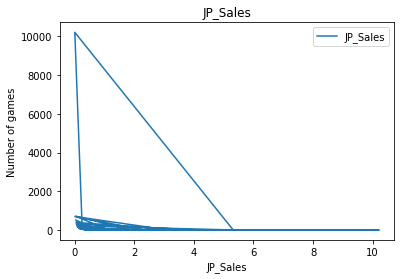

In [21]:
sales = {sale: df_n["JP_Sales"].to_list().count(sale) for sale in set(df_n["JP_Sales"])}
year_df = pd.DataFrame.from_dict(data=sales, orient="index", columns=["JP_Sales"])

fig = year_df.plot()
fig.set_title("JP_Sales")
fig.set_ylabel("Number of games")
fig.set_xlabel("JP_Sales")

In [22]:
print(df_n["JP_Sales"].quantile(0.05))
print(df_n["JP_Sales"].quantile(0.95))

0.0
0.36


In [23]:
print(df_n["JP_Sales"][df_n.JP_Sales < 0.0].count())
print(df_n["JP_Sales"][df_n.JP_Sales > 0.36].count())

0
814


In [24]:
print(df_n["Other_Sales"].max())
print(df_n["Other_Sales"].min())
sales_stat = {"mean": df_n["Other_Sales"].mean(),
            "median": df_n["Other_Sales"].median(),
            "mode": df_n["Other_Sales"].mode().to_list(),
            }
sales_stat

10.57
0.0


{'mean': 0.048426124854213985, 'median': 0.01, 'mode': [0.0]}

Text(0.5, 0, 'Other_Sales')

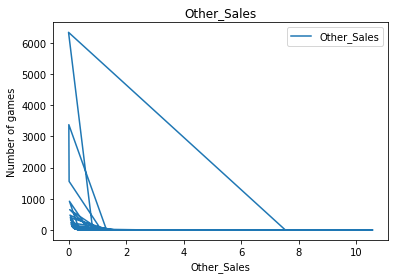

In [27]:
sales = {sale: df_n["Other_Sales"].to_list().count(sale) for sale in set(df_n["Other_Sales"])}
year_df = pd.DataFrame.from_dict(data=sales, orient="index", columns=["Other_Sales"])

fig = year_df.plot()
fig.set_title("Other_Sales")
fig.set_ylabel("Number of games")
fig.set_xlabel("Other_Sales")

In [25]:
print(df_n["Other_Sales"].quantile(0.05))
print(df_n["Other_Sales"].quantile(0.95))

0.0
0.2


In [26]:
print(df_n["Other_Sales"][df_n.Other_Sales < 0.0].count())
print(df_n["Other_Sales"][df_n.Other_Sales > 0.2].count())

0
785


In [28]:
print(df_n["Global_Sales"].max())
print(df_n["Global_Sales"].min())
sales_stat = {"mean": df_n["Global_Sales"].mean(),
            "median": df_n["Global_Sales"].median(),
            "mode": df_n["Global_Sales"].mode().to_list(),
            }
sales_stat

82.74
0.01


{'mean': 0.5409103185808114, 'median': 0.17, 'mode': [0.02]}

Text(0.5, 0, 'Global_Sales')

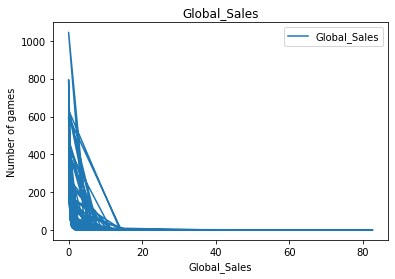

In [31]:
sales = {sale: df_n["Global_Sales"].to_list().count(sale) for sale in set(df_n["Global_Sales"])}
year_df = pd.DataFrame.from_dict(data=sales, orient="index", columns=["Global_Sales"])

fig = year_df.plot()
fig.set_title("Global_Sales")
fig.set_ylabel("Number of games")
fig.set_xlabel("Global_Sales")

In [29]:
print(df_n["Global_Sales"].quantile(0.05))
print(df_n["Global_Sales"].quantile(0.95))

0.02
2.05


In [30]:
print(df_n["Global_Sales"][df_n.Global_Sales < 0.02].count())
print(df_n["Global_Sales"][df_n.Global_Sales > 2.05].count())

600
811
